In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dzcnapy_plotlib as dzcnapy

In [2]:
# Drawing attributes
attrs = {"edge_color" : "gray", "node_color" : "pink",
         "node_size" : 250, "width" : 2, "font_size" : 12,
         "font_family" : "Liberation Sans Narrow",
         "font_weight" : "bold",}

In [3]:
print(attrs)

{'edge_color': 'gray', 'node_color': 'pink', 'node_size': 250, 'width': 2, 'font_size': 12, 'font_family': 'Liberation Sans Narrow', 'font_weight': 'bold'}


In [4]:
# Read the network, choose the central node
# We use the network we created from Wikipedia: go back to 03_Wikipedia notebook
# Them we set wiki page "Neighbourhood (Graph Theory)" as the ego we will expand later

G = nx.read_graphml("cna.graphml")
ego = "Neighbourhood (Graph Theory)"

In [5]:
# counting nodes: many different ways that produce the same output 

print(len(G))
print(len(G.node))
print(len(G.nodes()))
print(nx.number_of_nodes(G))

11648
11648
11648
11648


In [6]:
# counting edges

print(len(G.edges()))
print(nx.number_of_edges(G))

20385
20385


In [7]:
# counting missing edges: the edges that could connect two nodes but don't 
# The function nx.non_edges returns a Python generator of missing edges. 
# Before measuring it, you must convert it to a list. 
# Beware: most real-life graphs have orders of magnitude more missing edges than present edges. 
# Your computer may quickly run out of memory if you attempt to make a list out of them.

len(list(nx.non_edges(G)))

135643871

In [9]:
# density measures the fraction of existing edges out of the possible edges
# directed networks: m/n(n-1)
# undirectd networks: 2m/n(n-1)
# this is much faster than calculating: nx.number_of_edges(G)/nx.non_edges(G)

nx.density(G)

0.00015026065524584458

# Explore Neighborhoods

Let's zoom at microscopic level: we can focus on individual nodes and their neighbors

In [10]:
# alters1: the neighbors of the ego we defined before
# G[ego] returns only the neighbors reachable by the outgoing edges—the out-neighborhood (G is directed)

alters1 = G[ego]
print(alters1)
print(len(alters1))

{'Adjacency List': {}, 'Adjacency Matrix': {}, 'Avi Wigderson': {}, 'Bojan Mohar': {}, 'Chordal Graph': {}, 'Chromatic Number': {}, 'Claw-Free Graph': {}, 'Clustering Coefficient': {}, 'Combinatorica': {}, 'Comparability Graph': {}, 'Complement Graph': {}, 'Complete Graph': {}, 'Cycle Graph': {}, 'Degree (Graph Theory)': {}, 'Dense Graph': {}, 'Discrete Mathematics (Journal)': {}, 'Edge (Graph Theory)': {}, 'Gerhard Ringel': {}, 'Graph (Discrete Mathematics)': {}, 'Graph Isomorphism': {}, 'Graph Theory': {}, 'Icosahedron': {}, 'Independence Number': {}, 'Independent Set (Graph Theory)': {}, 'Induced Subgraph': {}, 'Isolated Vertex': {}, 'Journal Of Combinatorial Theory': {}, 'Journal Of The Acm': {}, 'Linear Time': {}, 'Loop (Graph Theory)': {}, 'Markov Blanket': {}, 'Modular Decomposition': {}, 'Moore Neighborhood': {}, 'Neighbourhood (Disambiguation)': {}, 'Neighbourhood (Mathematics)': {}, 'Octahedron': {}, 'Outerplanar Graph': {}, 'Paley Graph': {}, 'Pavol Hell': {}, 'Perfect Graph

In [11]:
# alters2 = function all_neighbors returns a generator object that you can convert to a list. 
# However, if you expect a node to have too many neighbors and you do need all them at once, 
# keep the neighborhood in the generator form until later.
# all_neighbors returns all adjacent nodes, regardless of the direction of adjacency.

alters2 = list(nx.all_neighbors(G, ego))
print(alters2)
print(len(alters2))

['Complex Network', 'Barabási–Albert Model', 'Biological Network', 'Boolean Network', 'Clustering Coefficient', 'Community Structure', 'Computer Network', 'Efficiency (Network Science)', 'Erdős–Rényi Model', 'Hierarchical Network Model', 'Hyperbolic Geometric Graph', 'Interdependent Networks', 'Modularity (Networks)', 'Network Motif', 'Network Science', 'Network Theory', 'Random Graph', 'Reciprocity (Network Science)', 'Reciprocity In Network', 'Scale-Free Network', 'Scientific Collaboration Network', 'Semantic Network', 'Small-World Network', 'Social Network', 'Spatial Network', 'Telecommunications Network', 'Transport Network', 'Watts And Strogatz Model', 'Exponential Random Graph Model', 'Adjacency List', 'Adjacency Matrix', 'Avi Wigderson', 'Bojan Mohar', 'Chordal Graph', 'Chromatic Number', 'Claw-Free Graph', 'Clustering Coefficient', 'Combinatorica', 'Comparability Graph', 'Complement Graph', 'Complete Graph', 'Cycle Graph', 'Degree (Graph Theory)', 'Dense Graph', 'Discrete Mathe

In [12]:
# A neighborhood is a dyadic structure. It is defined in terms of connections between two nodes: 
# the ego and an alter. Aside from serving as a reference to the ego’s inner circle, it conveys little information. 
# For example, it does not tell if and how its members are interconnected. 
# Adding the chord edges transforms the sparse neighborhood into an egocentric network

# Moreover, we need to add the "ego", because neither alter1 and alter2 contain it.

# Extract the neighborhood subgraph and the egonet
nhood = nx.subgraph(G, list(alters1.keys()) + [ego]).copy()
egonet = nx.ego_graph(G, ego)

# prepare the layout
pos = graphviz_layout(nhood) 

In [13]:
# Locate the chord edges and remove them
chords = [(n1, n2) for n1, n2 in nhood.edges() if n1 != ego and n2 != ego]
nhood.remove_edges_from(list(chords))

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


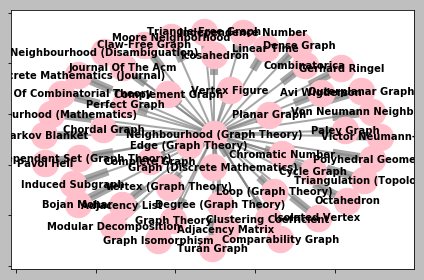

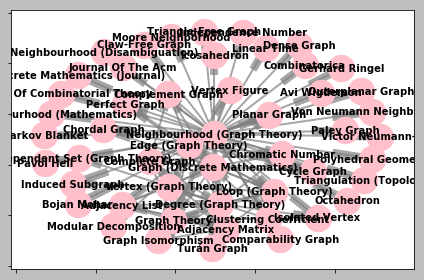

In [14]:
# Draw the neighborhood and the ego-centric network
for g, ofile in zip((nhood, egonet), ("neighborhood", "egonet")):
    nx.draw_networkx_edges(g, pos, alpha=0.7, **dzcnapy.attrs)
    nx.draw_networkx_nodes(g, pos, **dzcnapy.attrs)
    nx.draw_networkx_labels(g, pos, **dzcnapy.medium_attrs)
    dzcnapy.set_extent(pos, plt)

    dzcnapy.plot(ofile)


In [15]:
# Function nx.clustering(G, nodes=None) calculates the clustering coefficient of the nodes passed.
# That can be interpreted as a measure of the prevalence of triangles in an egocentric network. 
# The clustering coefficient is the fraction of possible triangles that contain the ego node and exist. 
# This measure is undefined for directed graphs; you must coerce a digraph to a undirected graph 

cc = nx.clustering(nx.Graph(G), ego)
print(cc)

0.23820915926179084


In [16]:
# Function nx.average_clustering calculates the mean clustering coefficient for all nodes of a simple network 
# (no loops, no directed or parallel edges).

acc = nx.average_clustering(nx.Graph(G))
print(acc)

0.16758128563295197


In [17]:
# The average clustering coefficient is not to be confused with the clustering coefficient of the 
# whole network—the fraction of all possible triangles that exist in the network. 
# The latter is known as transitivity, a measure of transitive closure (explained here). 
# networkx has a namesake function to calculate it, too:

trans = nx.transitivity(G)
print(trans)

0.010269397229484287


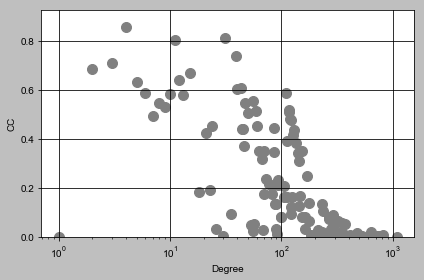

In [18]:
# This part of the script calculates degrees and clustering coefficients
# and plots a scatter plot of them

F = nx.Graph(G)
deg = pd.Series({d: nx.degree(G,d) for d in G})
cc = pd.Series({e: nx.clustering(F, e) for e in F})
deg_cc = pd.concat([deg, cc], axis=1)
deg_cc.columns = ("Degree", "CC")
deg_cc.groupby("Degree").mean().reset_index()\
    .plot(kind="scatter", x="Degree", y="CC", s=100)
plt.xscale("log")
plt.ylim(ymin = 0)
plt.grid()
dzcnapy.plot("deg_cc")

# Paths and distances

Networkx provide a set of tools for computing with paths

Function nx.shortest_simple_paths(G,u,v) returns a generator of all shortest paths between the nodes u and v. You can expand the generator into a list, but beware: it may take the program hours and even days to elicit all shortest paths in a large graph. Use this function with care! For example, you can get one path at a time by calling next.

In [19]:
path_gen = nx.shortest_simple_paths(G, ego, "Social Network")
next(path_gen)

['Neighbourhood (Graph Theory)', 'Clustering Coefficient', 'Social Network']

In [20]:
next(path_gen)

['Neighbourhood (Graph Theory)',
 'Adjacency List',
 'Graph Drawing',
 'Social Network']

In [21]:
# Function nx.shortest_path(G,source=None,target=None), returns only one of the shortest 
# paths between source and target, but if you omit either or both of the parameters, 
# it returns either all shortest paths starting at source or all shortest paths ending at target 
# or all shortest paths in the network.

path = nx.shortest_path(G, ego, "Social Network")
print(path)

['Neighbourhood (Graph Theory)', 'Clustering Coefficient', 'Social Network']


# Networks as circles

We can start thinking to networks as made of more central nodes and nodes that are (very) far from the center.
CNA offers a concept of node eccentricity — a measure of how far from (or close to) the center a node is, wherever the center is. The eccentricity is the maximum distance from a node to all other nodes in the network. The distance between two nodes is naturally defined as the length of the geodesic between the two nodes.

The remaining “circular” network properties are defined through the eccentricity. If you already calculated it, do not throw it away, but pass to the following functions for the sake of performance.

In [22]:
# Function nx.eccentricity(G,v=Node) returns the eccentricity for one node v or the whole graph. 
# Note that in a directed graph there may be no directed geodesics for some pairs of nodes. 
# You must decide if it is appropriate to coerce the digraph to an undirected graph.

ecc = nx.eccentricity(nx.Graph(G))
print(ecc[ego])

3


In [23]:
# The diameter of a network is the maximum eccentricity. 

print(nx.diameter(G, ecc))

4


In [24]:
# The radius of a network is the minimum eccentricity. 

print(nx.radius(G, ecc))

2


In [25]:
# The center of a network is a set of all nodes whose eccentricity equals the radius. 

print(nx.center(G, e=ecc))

['Complex Network']


In [26]:
# The periphery of a network is a set of all nodes whose eccentricity equals the diameter. 
# The set of peripheral nodes in a complex network is usually large.

nx.periphery(G, e=ecc)

['Array Data Structure',
 'Binary Search',
 'Boost Graph Library',
 'Charles E. Leiserson',
 'Clifford Stein',
 'Dgml',
 'Dot (Graph Description Language)',
 'David Eppstein',
 'Gxl',
 'Graphml',
 'Graph Modelling Language',
 'Graph Database',
 'Graph Theory',
 'Guido Van Rossum',
 'Hash Table',
 'Introduction To Algorithms',
 'Lcf Notation',
 'Linked Data',
 'Matrix (Mathematics)',
 'Michael T. Goodrich',
 'Newick Format',
 'Object Oriented',
 'Roberto Tamassia',
 'Ronald L. Rivest',
 'Sequential Search',
 'Singly Linked List',
 'Sparse Graph',
 'Thomas H. Cormen',
 'Trivial Graph Format',
 'Xgmml',
 '(0,1)-Matrix',
 'Algebraic Graph Theory',
 'Base64',
 'Brendan Mckay',
 'Cayley Graph',
 'Characteristic Polynomial',
 'Chris Godsil',
 'Connectivity (Graph Theory)',
 'Data Structure',
 'Degree Matrix',
 'Determinant',
 'Discrete Applied Mathematics',
 'Distance Matrix',
 'Eigenvalue',
 'Eigenvector',
 'Empty Graph',
 'Eric W. Weisstein',
 'Expander Graph',
 'Frank Harary',
 'Gordon Roy

# Centralities

One of the goals of social network analysis is to identify actors with outstanding properties: the most influential, the most efficient, the most irreplaceable—in other words, the most important. CNA, in general, is also looking at the most important nodes: key products in product networks; key words in semantic networks; key events in the networks of events, and the like. One of the central premises of CNA is that the importance of a node depends on the structural position of the node in the network and can be calculated from neighborhoods, geodesics or some other structural elements. Let’s go over some most common centrality measures, without going deep into the theory. (If you are a curious reader, treat yourself with [M Jackson. Social and Economic Networks. Princeton University Press, Princeton, NJ, 2008.] that covers the theory of centralities and many other CNA topics!

In [27]:
# A study of centralities
dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)

In [28]:
centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [29]:
# Calculate the correlations for each pair of centralities
c_df = centralities.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_series = c_df.stack().sort_values()
c_series.tail()

PageRank     Authorities           0.801584
Betweenness  Degree                0.809589
PageRank     Eigenvector           0.906300
Eigenvector  Authorities           0.936817
Closeness    Harmonic Closeness    0.987097
dtype: float64

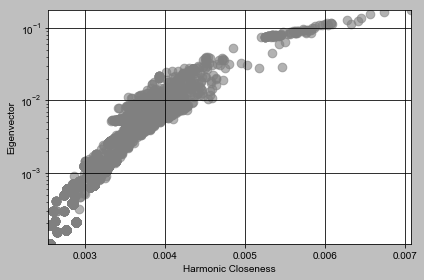

In [30]:
X = "Harmonic Closeness"
Y = "Eigenvector"
limits = pd.concat([centralities[[X, Y]].min(),
                    centralities[[X, Y]].max()], axis=1).values
centralities.plot(kind="scatter", x=X, y=Y, xlim=limits[0], ylim=limits[1],
                  s=75, logy=True, alpha=0.6)
plt.grid()
dzcnapy.plot("eig_vs_harm")


# Estimate Network Uniformity through Assortativity

Attribute analysis looks into assortativity: correlation between the values of a node attribute across edges. A network with positively correlated attributes is called assortative; in an assortative network, nodes tend to connect to nodes with similar attribute values. This tendency is called assortative mixing. A dissortative (negatively correlated) network is the opposite of an assortative one.

The simplest form of assortativity is degree (indegree, outdegree) assortativity: the correlation between the degree of a node and the average degree of its neighbors. Function nx.average_degree_connectivity(G) returns a dictionary with unique node degrees as keys and matching average neighbors’ degrees as values. 

In [31]:
# The following code fragment calculates the dictionary and separates the keys and values into 
# two lists my_degree and their_degree:

my_degree, their_degree = zip(*nx.average_degree_connectivity(G).items())

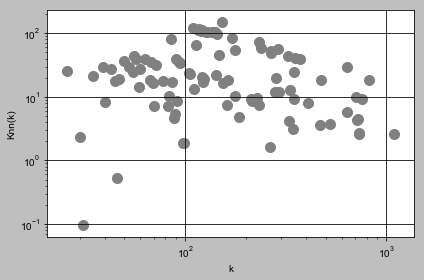

In [32]:
k_knn = pd.concat([pd.Series(v) for v in (my_degree, their_degree)], axis=1)
k_knn.columns = ("k", "Knn(k)")
k_knn.groupby("k").mean().reset_index()\
    .plot(kind="scatter", x="k", y="Knn(k)", s=100, logx = True, logy=True)
plt.grid()
dzcnapy.plot("k_knn")
# the plot is quite ugly, but in some cases is much prettier :)

In [33]:
k_knn

,k,Knn(k)
0,153,151.705882
1,72,32.069444
2,124,18.862903
3,229,9.668122
4,68,35.161765
5,722,4.555402
6,43,27.906977
7,30,2.333333
8,63,39.833333
9,141,106.588652


# Measuring Homophily 

Degree assortativity may be somewhat hard to interpret, but when it comes to other attributes, especially related to human demographics, there are certain expectations—and a social theory that explains them: homophily. 

Homophily is the propensity of actors to associate with somewhat similar actors. 

For example, we can check if our  the social network is assortative with respect to age and gender. Networkx provides two functions for assessing attribute assortativity. 

The first function nx.attribute_mixing_matrix takes a graph, an attribute name, and an optional mapping dictionary, and returns a two-dimensional NumPy array.

nx.attribute_mixing_matrix(G, "gender", mapping={"M": 0, "F": 1})<br/>
<= 	array([[ 0.22771058,  0.24064205],<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ 0.24064205,  0.29100532]])
           
The ith row and jth column of the array contain the fraction of adjacent nodes that have the ith and jth values of the attribute, respectively. The mapping links non-numeric attribute values with row and column indexes. In the previous matrix, 0.22771058 (≈23%) of edges connect male actors, and 0.29100532 (≈29%) of edges connect female actors. The fraction of same-gender edges is just above 50 percent, which suggests that the members of the network do not prefer same-gender connections. The network is not homophilic from the gender point of view.

The second function, nx.attribute_assortativity_coefficient, confirms the previous result. The function returns the assortativity coefficient—the correlation between the values of an attribute across edges.

nx.attribute_assortativity_coefficient(G, "gender")<br/>
<= 	0.03356000539110733”
